## Introduction

The Pima Indian Diabetes Dataset is a publicly available dataset that contains information on 768 Pima Indian women who were diagnosed with diabetes mellitus between 1991 and 1995. The dataset includes a variety of demographic and medical information, including:

- Personal characteristics: Age, body mass index (BMI), Number of times been pregnant, Triceps skin fold thickness (mm)
- Diagnostic measurements: Diastolic blood pressure, Plasma glucose concentration, serum insulin concentration 
 
The dataset was collected by the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) as part of a study to investigate the risk factors for diabetes mellitus in the Pima Indian population. The study aimed to identify factors that could be used to predict and prevent diabetes in this population.

Diabetes mellitus is a chronic metabolic disorder characterized by elevated blood sugar levels. It is a major public health concern, affecting millions of people worldwide. Diabetes can lead to serious complications, including heart disease, stroke, kidney failure, and blindness.

The dataset is important because it provides information on a population that is at high risk for diabetes. The Pima Indians have a prevalence of diabetes that is three times higher than the national average. This makes the dataset valuable for studying the factors that contribute to diabetes in high-risk populations.


### Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
import plotly.express as px
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats import chi2_contingency
import pylab

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Understanding Data

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Probability of diabetes based on family history
- Age: Age (years)
- Outcome: Class variable (0 or 1)

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

### Missing Values

In [7]:
df.isnull().sum().reset_index()

,index,0
0,Pregnancies,0
1,Glucose,5
2,BloodPressure,35
3,SkinThickness,227
4,Insulin,374
5,BMI,11
6,DiabetesPedigreeFunction,0
7,Age,0
8,Outcome,0


### Checking for Outliers and Handling Missing Values

In [8]:
def box_plot(df,title):
    plt.figure(figsize=(10, 2))
    plt.title(title)
    sns.boxplot(df, orient='h')
    plt.show()

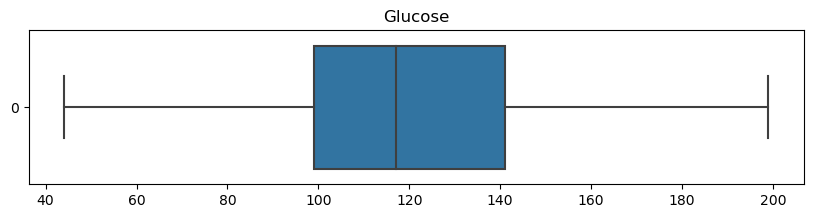

In [9]:
box_plot(df['Glucose'], "Glucose")

Zero or no outliers detected. Hence, missing values will be replaced with the mean value.

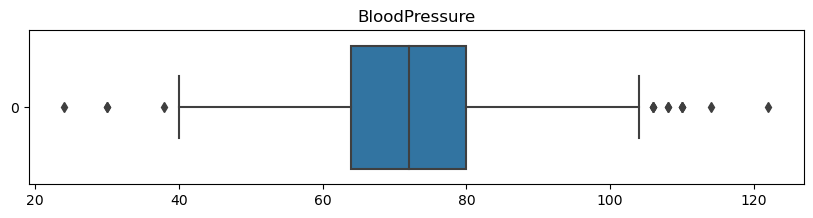

In [10]:
box_plot(df['BloodPressure'],'BloodPressure')

Few Outliers detected. Missing values will be replaced with the mean value.

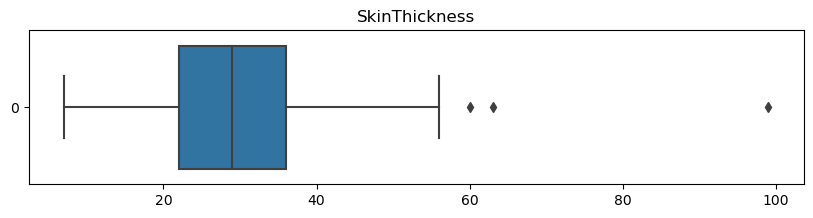

In [11]:
box_plot(df['SkinThickness'],'SkinThickness')

Extreme outliers are present. Missing values will be replaced with the median value.

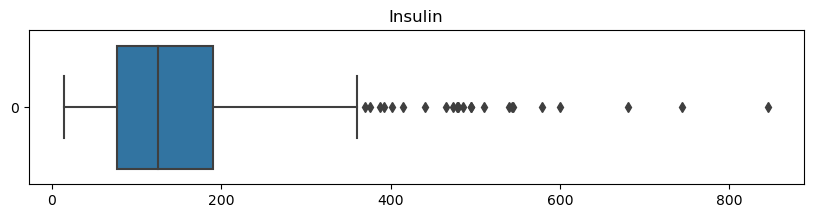

In [12]:
box_plot(df['Insulin'],'Insulin')

Numerous outliers are present. Missing values will be replaced with the median value.

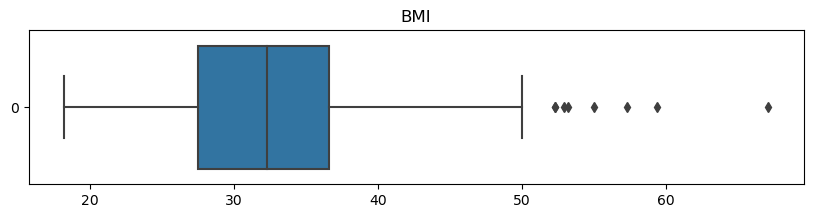

In [13]:
box_plot(df['BMI'],'BMI')

Numerous outliers are present. Missing values will be replaced with the median value.

In [14]:
#replacing missing values using mean and median imputation.

df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

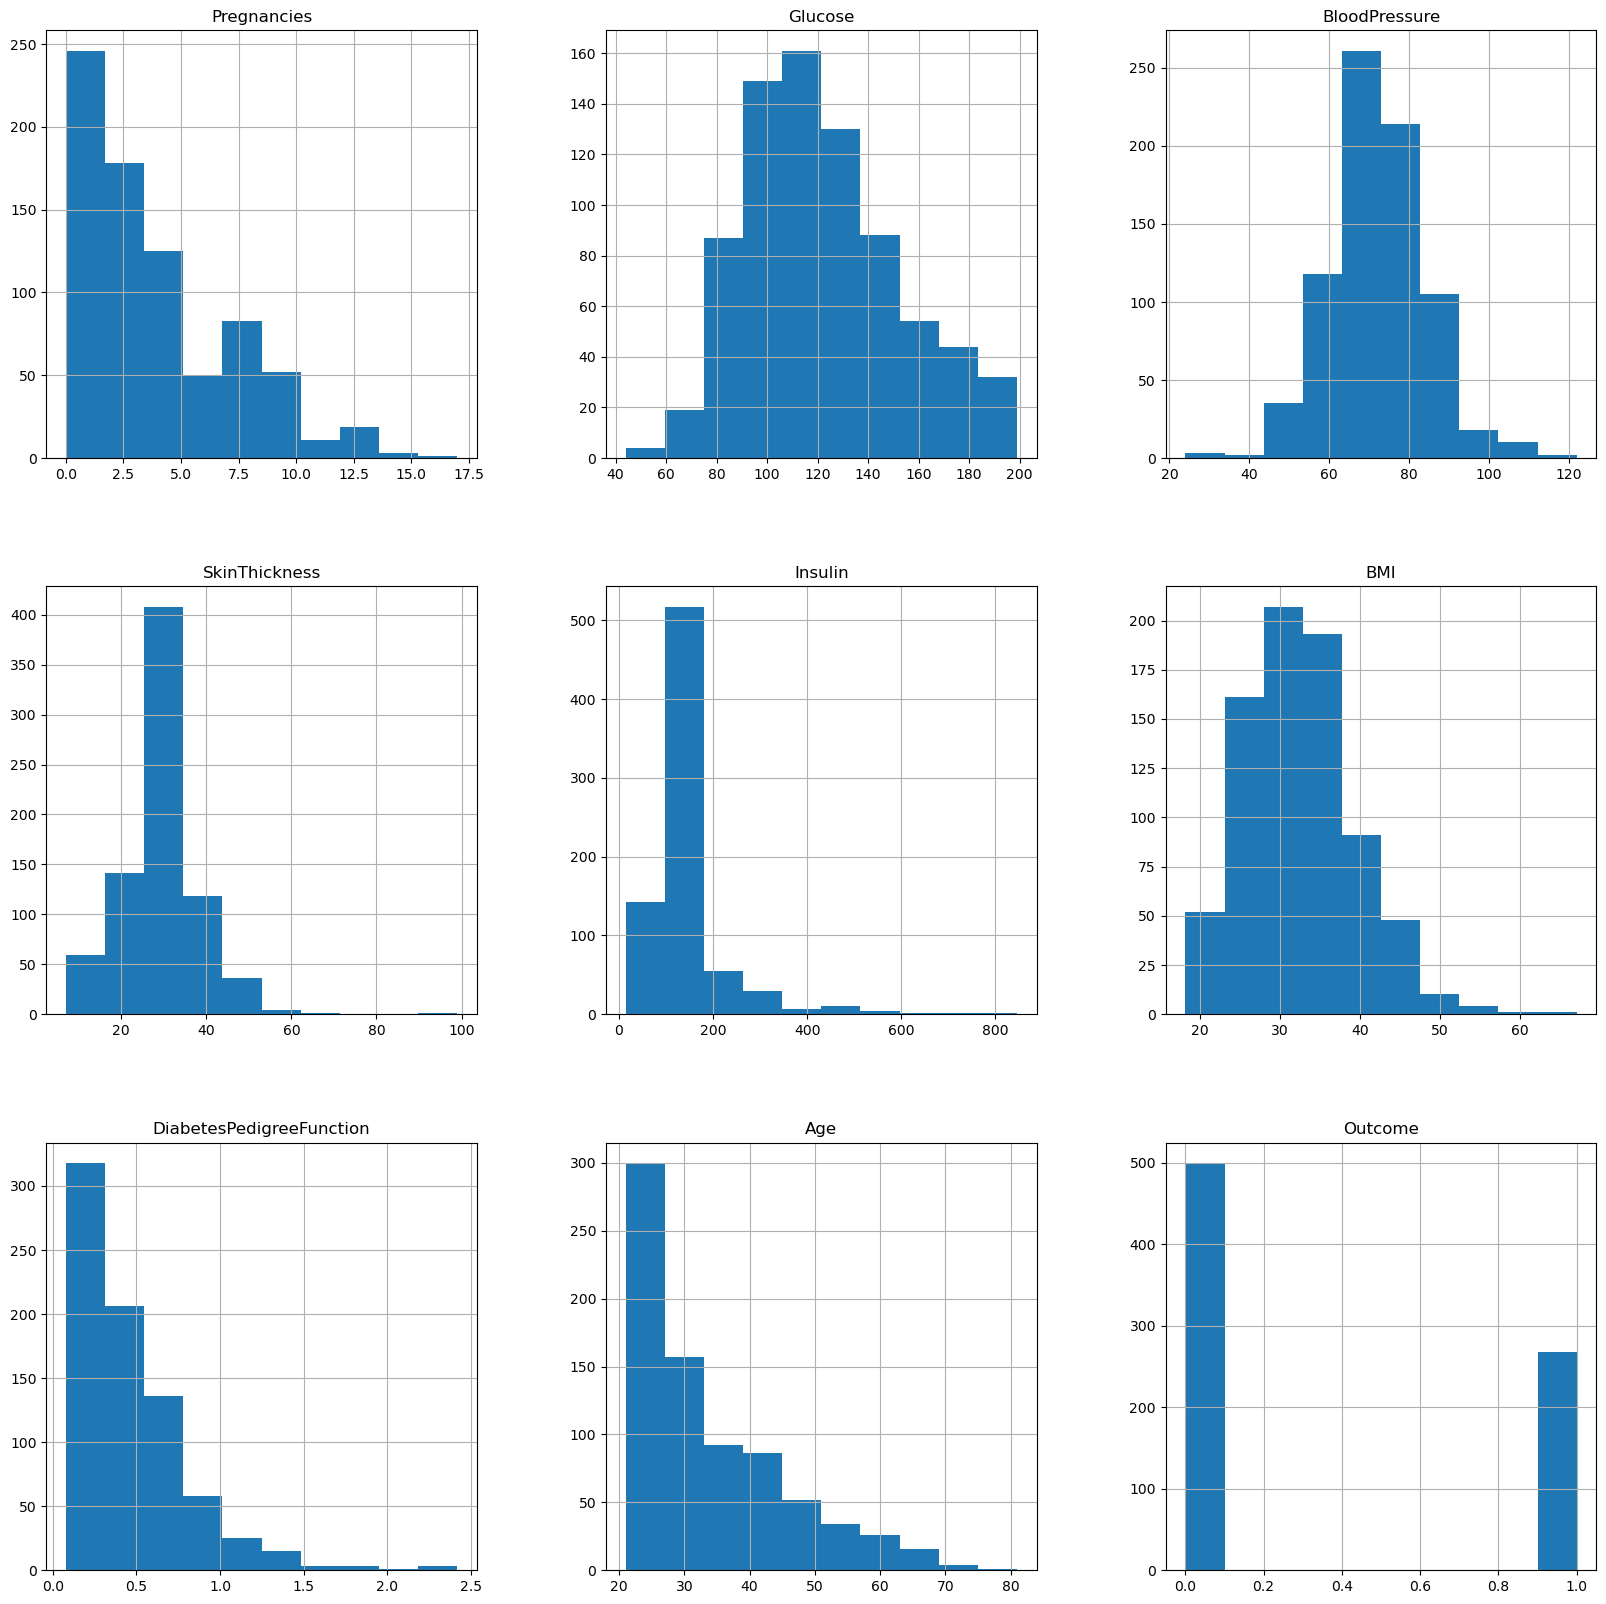

In [16]:
df.hist(figsize = (20,20))

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Descriptive Statitics

In [18]:
def histogram_qq(data,title, x_label, y_label):
    
    fig=plt.figure(figsize=(10,5))
    fig.suptitle(title + ' Column Distribution', fontweight='bold', fontsize=11)
   
     # --- Histogram ---
    ax_1=fig.add_subplot(1, 2, 1)
    plt.hist(data, color = "#B0C4DE")
    plt.title('Histogram Plot')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    mean = data.mean()
    median = data.median()
    mode = data.mode().values[0]
    ax_1.axvline(mean, color='r', linestyle='--', label="Mean")
    ax_1.axvline(median, color='g', linestyle='-', label="Median")
    ax_1.axvline(mode, color='b', linestyle='-', label="Mode")

    ax_1.legend()
    
    
    # --- QQ plot --- 
    ax_2=fig.add_subplot(1, 2, 2)
    st.probplot(data, dist="norm", plot=pylab)
    plt.title('QQ Plot')
    plt.show()

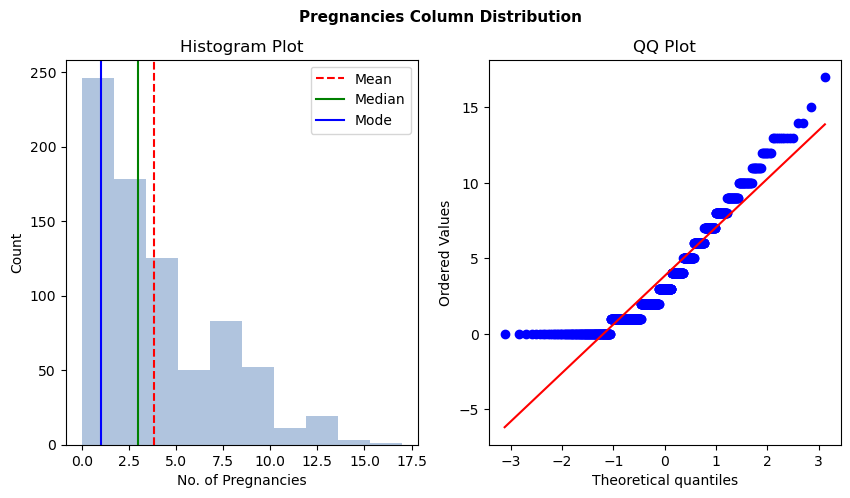

In [19]:
histogram_qq(df['Pregnancies'],'Pregnancies', 'No. of Pregnancies', 'Count')

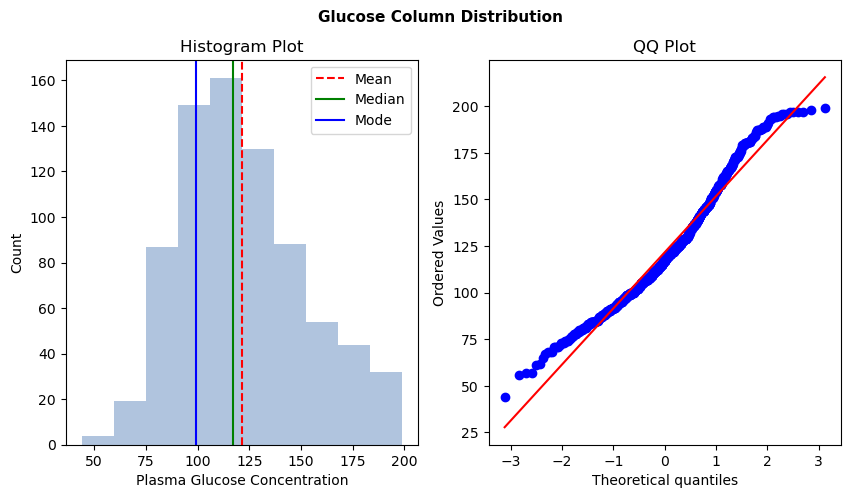

In [20]:
histogram_qq(df['Glucose'],'Glucose', 'Plasma Glucose Concentration', 'Count')

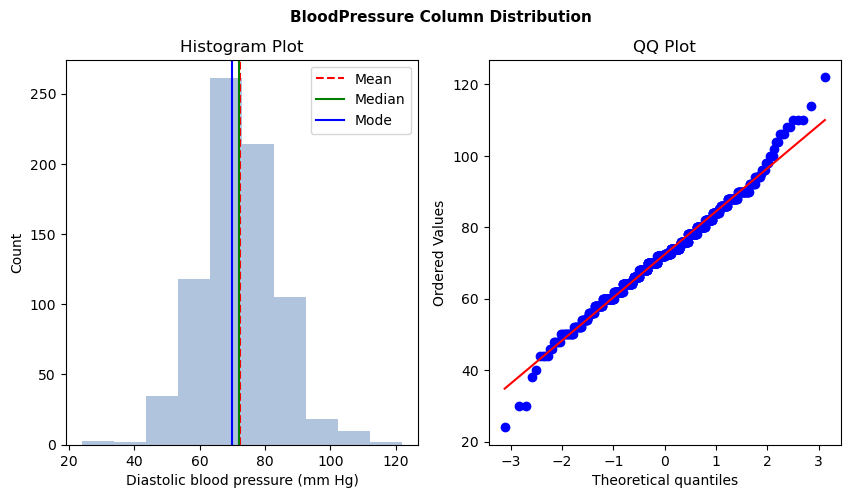

In [21]:
histogram_qq(df['BloodPressure'],'BloodPressure', 'Diastolic blood pressure (mm Hg)', 'Count')

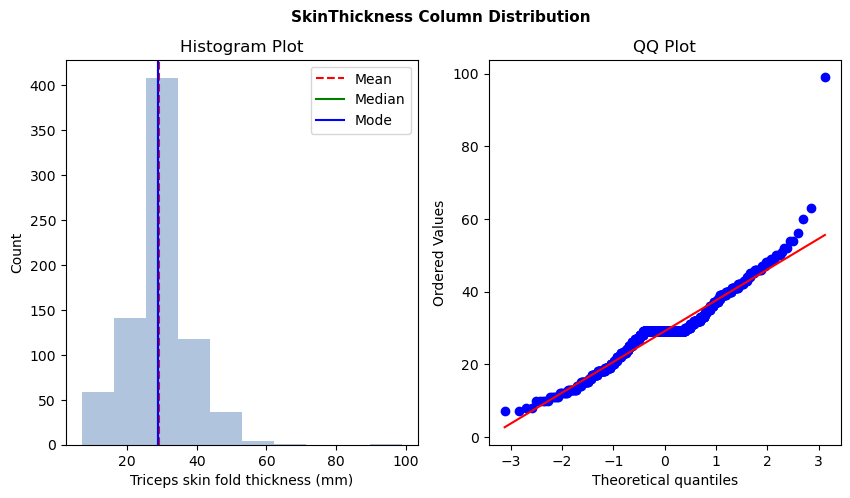

In [22]:
histogram_qq(df['SkinThickness'],'SkinThickness', 'Triceps skin fold thickness (mm)', 'Count')

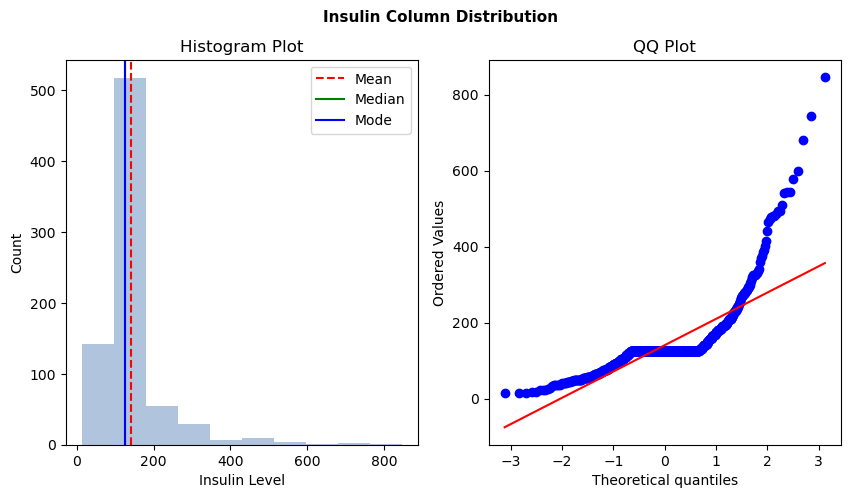

In [23]:
histogram_qq(df['Insulin'],'Insulin', 'Insulin Level', 'Count')

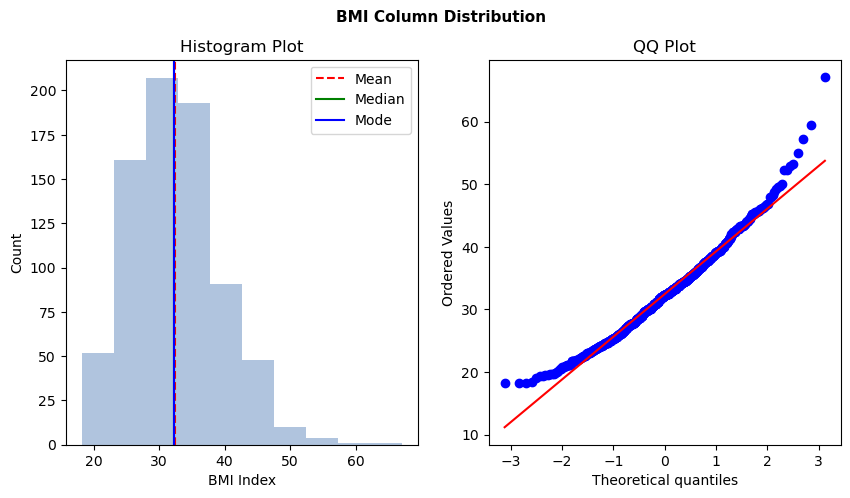

In [24]:
histogram_qq(df['BMI'],'BMI', 'BMI Index', 'Count')

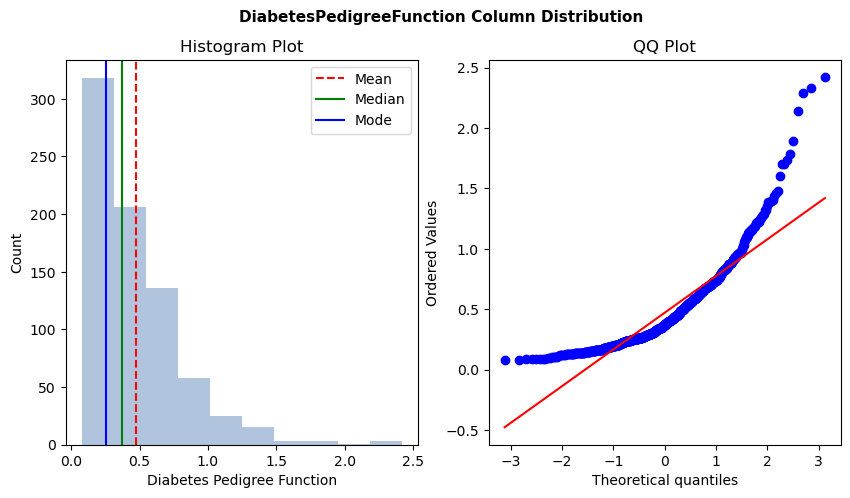

In [25]:
histogram_qq(df['DiabetesPedigreeFunction'],'DiabetesPedigreeFunction', 'Diabetes Pedigree Function', 'Count')

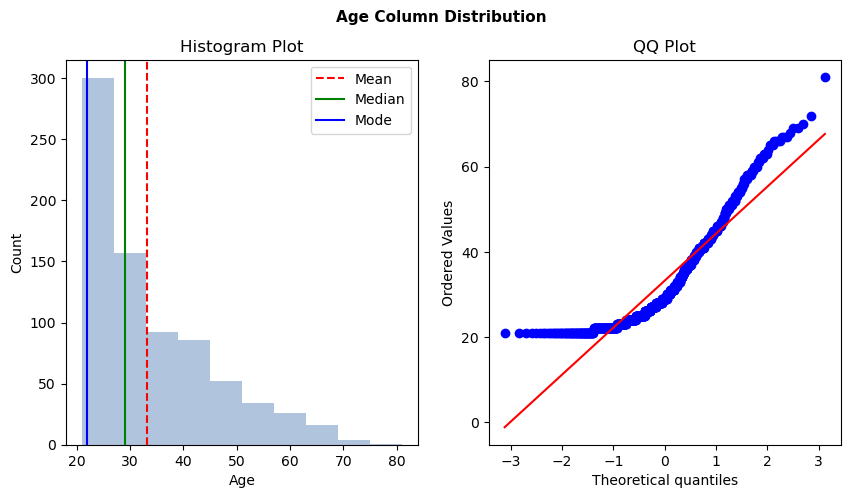

In [26]:
histogram_qq(df['Age'],'Age', 'Age', 'Count')

In [27]:
df.describe().transpose().reset_index().to_excel('summary.xlsx')

In [28]:
#Inter Quartile Range

for col in df.columns[:8]:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    print('IQR of %s : %d' %(col,IQR))

IQR of Pregnancies : 5
IQR of Glucose : 40
IQR of BloodPressure : 16
IQR of SkinThickness : 7
IQR of Insulin : 5
IQR of BMI : 9
IQR of DiabetesPedigreeFunction : 0
IQR of Age : 17


In [29]:
#Range of each variable

for col in df.columns[:8]:
    range = df[col].max() - df[col].min()
    print('range of %s : %d'%(col,range))

range of Pregnancies : 17
range of Glucose : 155
range of BloodPressure : 98
range of SkinThickness : 92
range of Insulin : 832
range of BMI : 48
range of DiabetesPedigreeFunction : 2
range of Age : 60


In [30]:
#skewedness

df.skew()

Pregnancies                 0.901674
Glucose                     0.532719
BloodPressure               0.137305
SkinThickness               0.837608
Insulin                     3.380019
BMI                         0.599233
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

### Categorical Variable : 'Outcome'

In [31]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [32]:
df['Outcome'] = df['Outcome'].replace([0,1], ['Negative', 'Positive'])
df['Outcome'].value_counts()

Negative    500
Positive    268
Name: Outcome, dtype: int64

In [33]:
df['Outcome'].value_counts().reset_index()

,index,Outcome
0,Negative,500
1,Positive,268


<Axes: >

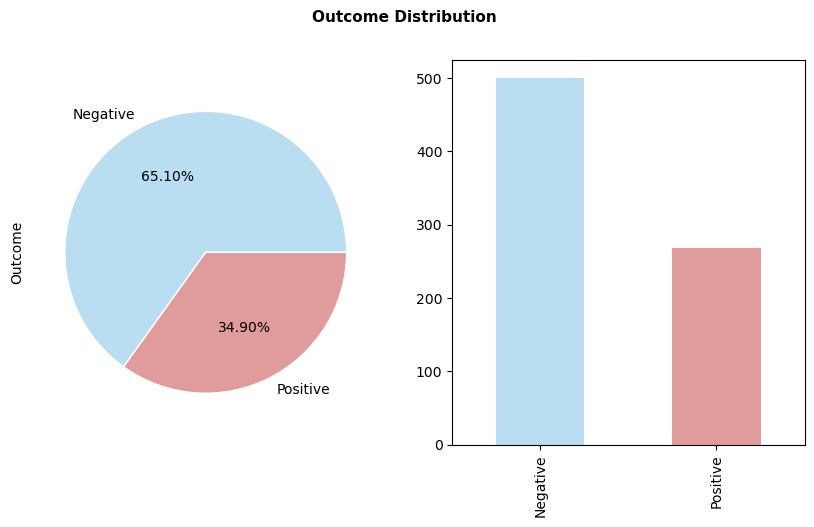

In [34]:
#Plotting outcome distribution

fig=plt.figure(figsize=(10,5))
fig.suptitle('Outcome Distribution', fontweight='bold', fontsize=11)

ax_1=fig.add_subplot(1, 2, 1)
colors = ["#B9DDF1", "#e09b9b"]
df['Outcome'].value_counts().plot(kind = 'pie', autopct='%.2f%%', colors=colors,
                                 wedgeprops = {"linewidth": 1, "edgecolor": "white"})

ax_2=fig.add_subplot(1, 2, 2)
df['Outcome'].value_counts().plot(kind = 'bar', color=colors)


In [35]:
df.groupby(["Outcome"]).mean() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
Negative,3.298000,110.710121,70.935397,27.726000,127.792000,30.885600,0.429734,31.190000
Positive,4.865672,142.165573,75.147324,31.686567,164.701493,35.383582,0.550500,37.067164


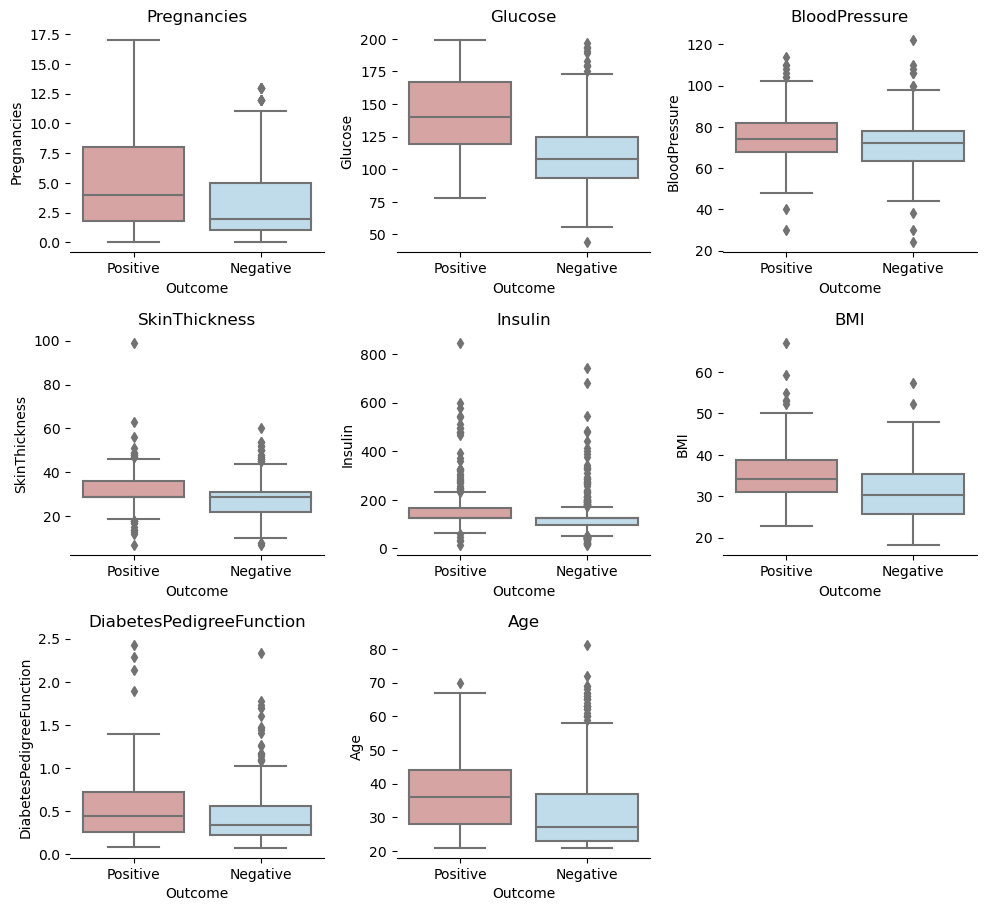

In [36]:
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age',]
plt.figure(figsize=(10,30))

colors = ["#e09b9b","#B9DDF1"]
sns.set_palette(sns.color_palette(colors))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='Outcome',y= df[variable], data=df)     
        sns.despine(top=True,right=True,left=True) # to remove side line from graph
        plt.tight_layout(pad = 1.2)
        plt.title(variable)

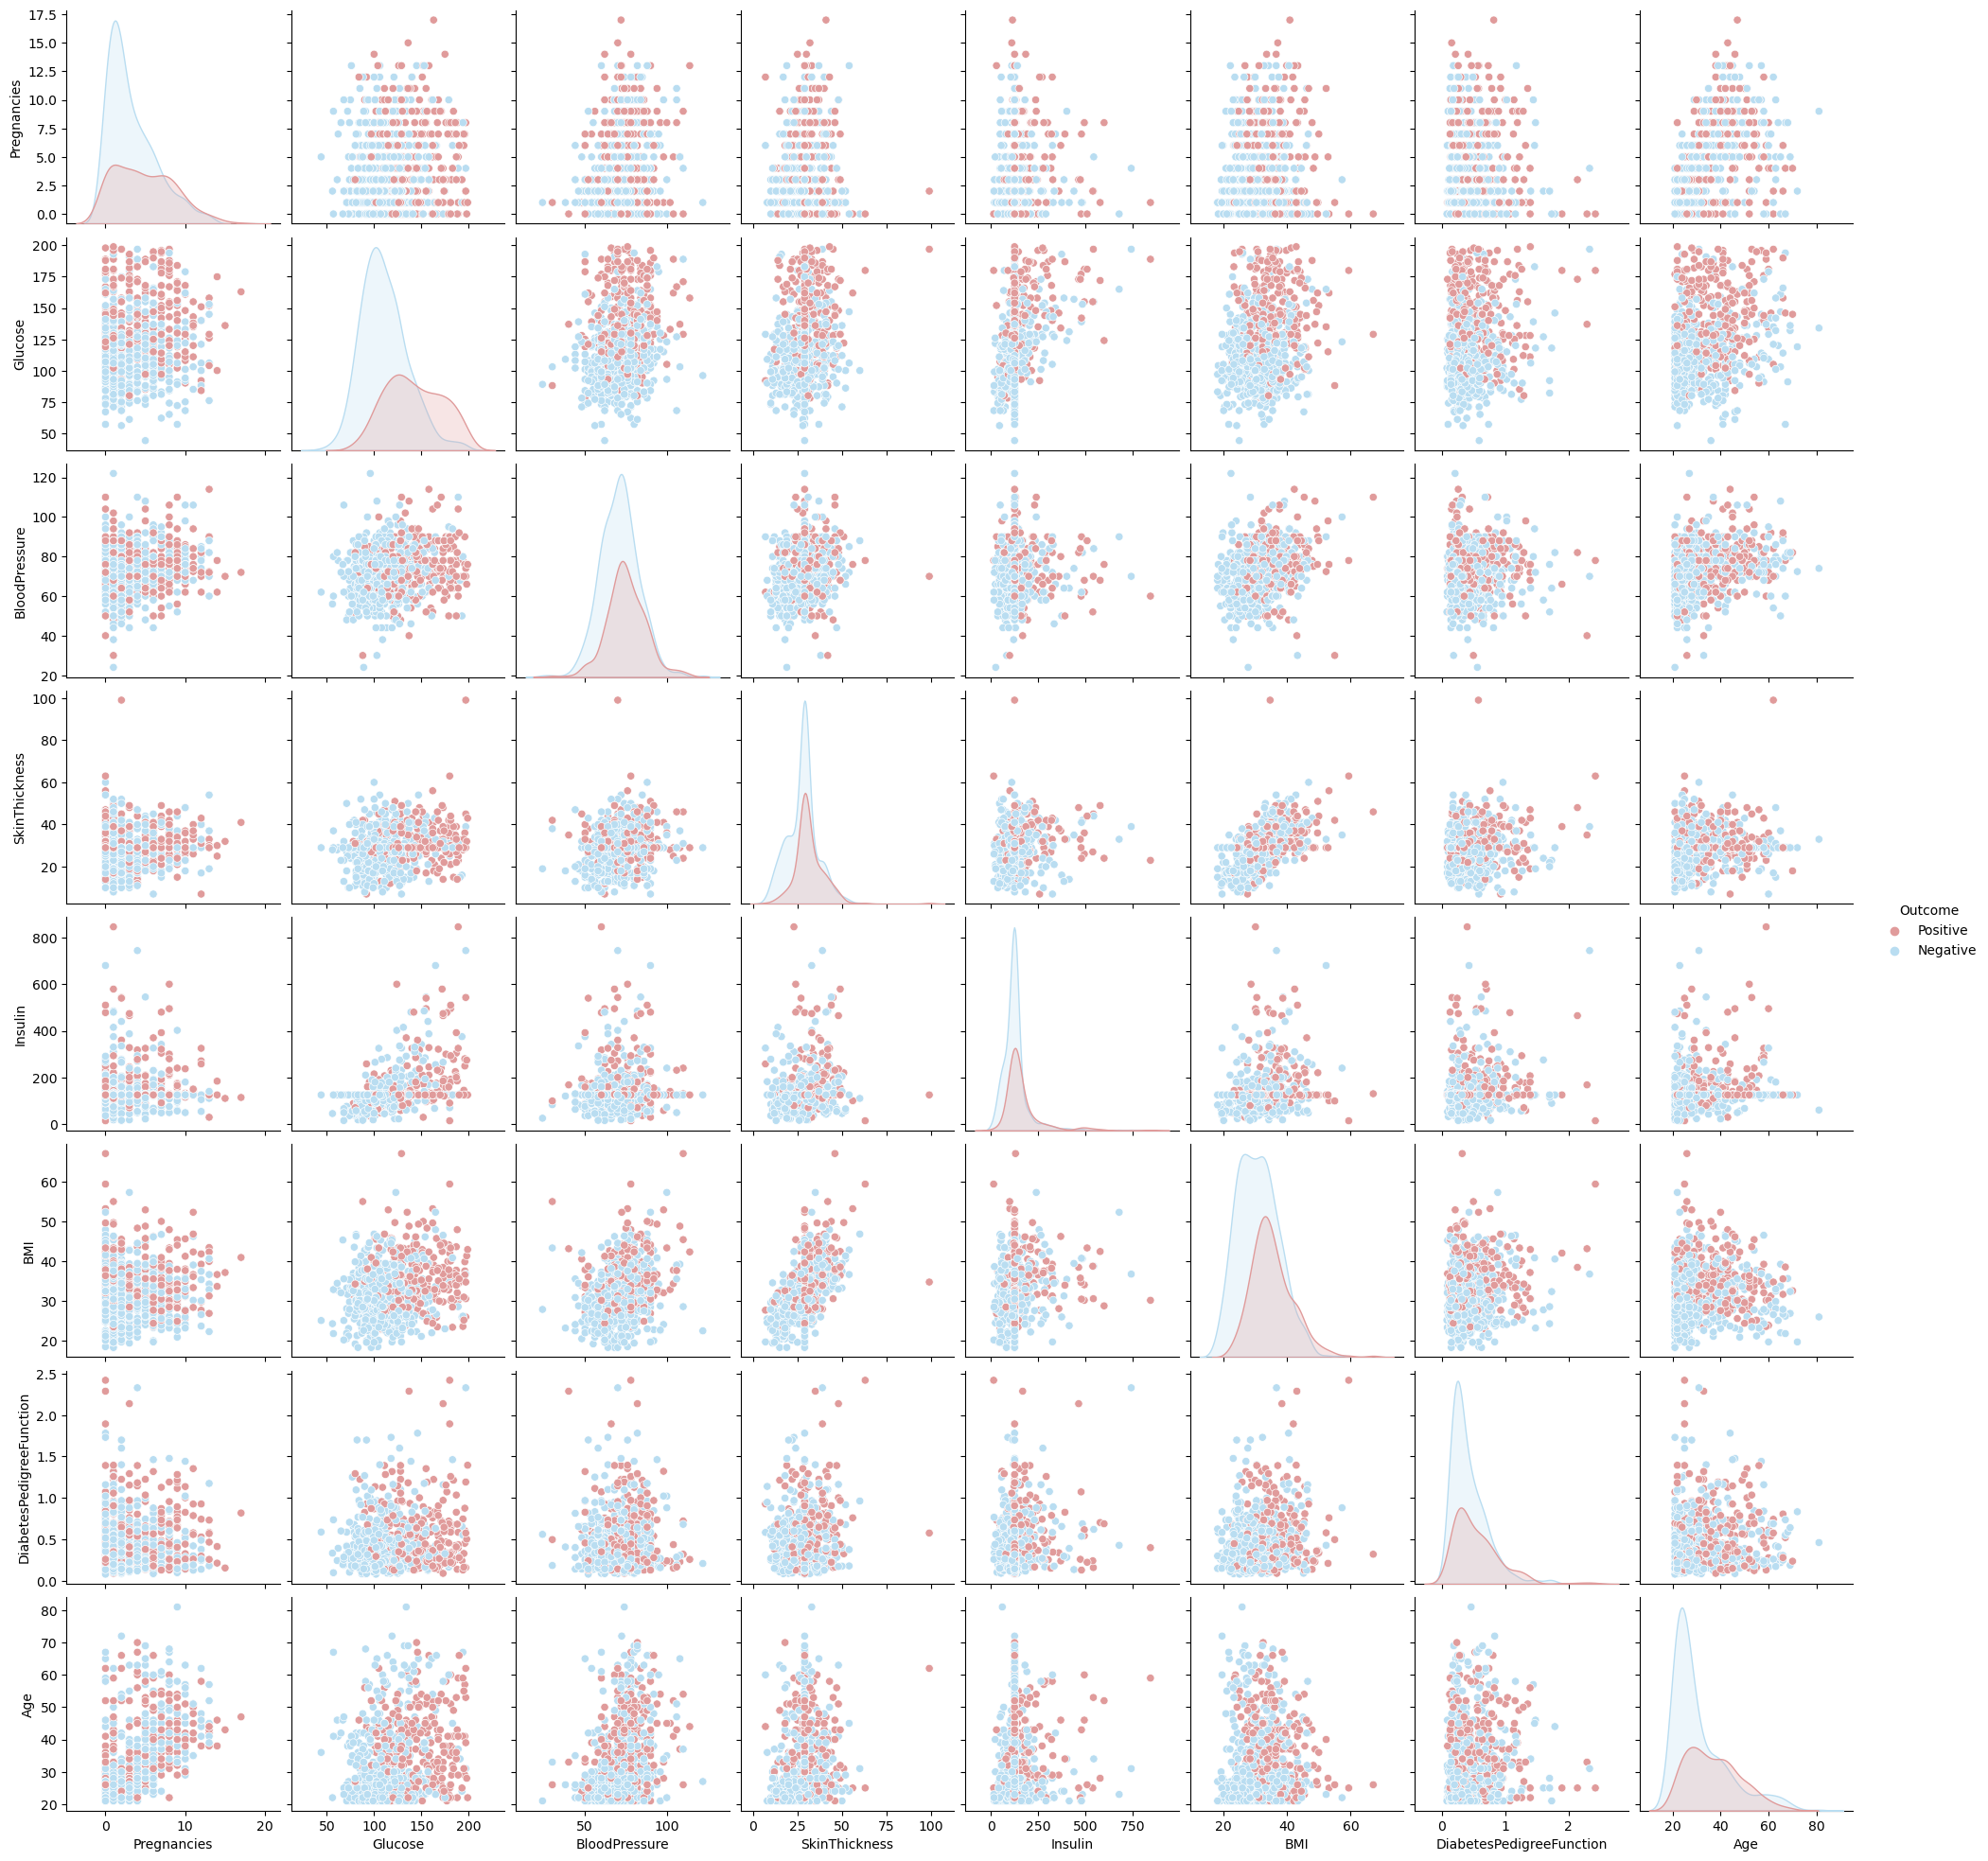

In [37]:
sns.pairplot(df,hue='Outcome')

In [38]:
#Correlation Matrix

corr = df[df.columns].corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000


<Axes: >

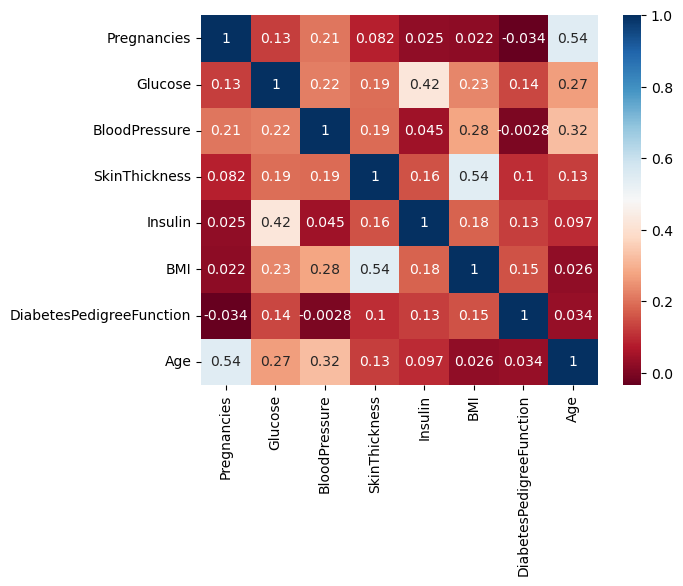

In [39]:


sns.heatmap(corr, annot = True,cmap='RdBu')

## Statistical Methods/Tests/Models

## Comparing the mean plasma glucose levels between diabetic and non-diabetic patients:

We will use a t test. (Included in the report)

Hypotheses:
- H0 : There is no significant difference in mean plasma glucose levels between diabetic and non-diabetic patients
- H1 : There is a significant difference in mean plasma glucose levels between diabetic and non-diabetic patients

In [40]:
diabetic_plasma_glucose = df[df['Outcome']=='Positive']['Glucose']
non_diabetic_plasma_glucose = df[df['Outcome']=='Negative']['Glucose']

t_statistic, p_value = st.ttest_ind(diabetic_plasma_glucose, non_diabetic_plasma_glucose)

print ('t statistic : ',t_statistic)
print ('p value : ',p_value)

if p_value < 0.05:
    print("We reject null hypothesis")
    print ('There is a significant difference in mean plasma glucose levels between diabetic and non-diabetic patients')
else:    
    print("we accept null hypothesis")
    print ('There is no significant difference in mean plasma glucose levels between diabetic and non-diabetic patients')

t statistic :  15.67989823120835
p value :  2.909251656846331e-48
We reject null hypothesis
There is a significant difference in mean plasma glucose levels between diabetic and non-diabetic patients


The p-value is the probability of obtaining a test statistic as extreme or more extreme than the observed one, assuming the null hypothesis (no difference between the means) is true. If the p-value is less than 0.05 (a common significance level), we reject the null hypothesis and conclude that there is a statistically significant difference between the means of the two groups.

<Axes: xlabel='Glucose', ylabel='Density'>

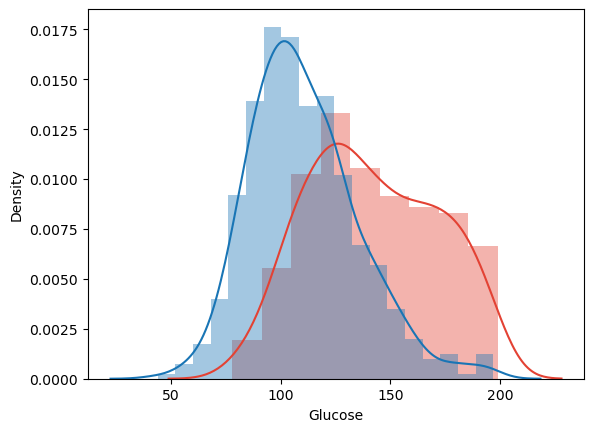

In [41]:
# Distribution of Glucose based on the Outcome

sns.distplot(diabetic_plasma_glucose, color='#e34234')
sns.distplot(non_diabetic_plasma_glucose, color='#1975b5')

## Comparing the mean BMI values between diabetic and non-diabetic patients:

Not included in the report.

Hypotheses:
- H0 : There is no significant difference in mean BMI values between diabetic and non-diabetic patients
- H1 : There is a significant difference in mean BMI values between diabetic and non-diabetic patients

In [42]:
diabetic_BMI = df[df['Outcome']=='Positive']['BMI']
non_diabetic_BMI = df[df['Outcome']=='Negative']['BMI']

t_statistic, p_value = st.ttest_ind(diabetic_BMI, non_diabetic_BMI)

print (t_statistic, p_value)

if p_value < 0.05:
    print("We reject null hypothesis")
    print ('There is a significant difference in mean BMI values between diabetic and non-diabetic patients')
else:    
    print("we accept null hypothesis")
    print ('There is no significant difference in mean BMI values between diabetic and non-diabetic patients')

9.09006441398665 8.336902677508857e-19
We reject null hypothesis
There is a significant difference in mean BMI values between diabetic and non-diabetic patients


## Comparing the mean no. of Pregnancies between diabetic and non-diabetic patients: 

Not included in the report.

Hypotheses:
- H0 : There is no significant difference in mean no. of Pregnancies between diabetic and non-diabetic patients
- H1 : There is a significant difference in mean no. of Pregnancies between diabetic and non-diabetic patients

In [43]:
diabetic_preg = df[df['Outcome']=='Positive']['Pregnancies']
non_diabetic_preg = df[df['Outcome']=='Negative']['Pregnancies']

t_statistic, p_value = st.ttest_ind(diabetic_preg, non_diabetic_preg)

print (t_statistic, p_value)

if p_value < 0.05:
    print("We reject null hypothesis")
    print('There is a significant difference in mean no. of Pregnancies between diabetic and non-diabetic patients')
else:    
    print("we accept null hypothesis")
    print('There is no significant difference in mean no. of Pregnancies between diabetic and non-diabetic patients')

6.298430550035151 5.065127298053476e-10
We reject null hypothesis
There is a significant difference in mean no. of Pregnancies between diabetic and non-diabetic patients


## Is there an association between Pregnancy and Diabetes?

Not included in the report.

Chi - Squared Test

In [44]:
#splitting the Pregnancy column in to 2. 


df['Pregnancy History'] = df['Pregnancies'].apply(lambda x: 'yes' if x > 0 else 'no')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancy History
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,Positive,yes
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,Negative,yes
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,Positive,yes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,Negative,yes
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,Positive,no


Constructing the Hypotheses

- H0 : Diabetes and Pregnancy are Independent (Independent)
- H1 : Diabetes and Pregnancy are Dependent (Associated)

In [45]:
#create the cross-table
contingency_table = pd.crosstab(df['Outcome'], df['Pregnancy History'])

contingency_table

Pregnancy History,no,yes
Outcome,,
Negative,73,427
Positive,38,230


In [46]:
chi2_statistic, p_value, degrees_of_freedom, expected_counts = chi2_contingency(contingency_table)

In [47]:
from scipy.stats import chi2

confidence_level = 0.95
critical_value = chi2.ppf(confidence_level, degrees_of_freedom)

In [48]:
is_significant = chi2_statistic > critical_value
is_significant

False

In [49]:
# Display the results
chi2_results = {
    'Chi-Square Statistic': chi2_statistic,
    'Degrees of Freedom': degrees_of_freedom,
    'P-Value': p_value,
    'Critical Value (95%)': critical_value,
    'Association is Significant at 95%': is_significant
}

chi2_results

{'Chi-Square Statistic': 0.002546320599888377,
 'Degrees of Freedom': 1,
 'P-Value': 0.9597549634913316,
 'Critical Value (95%)': 3.841458820694124,
 'Association is Significant at 95%': False}

In [50]:
if chi2_statistic >= critical_value:
    print("Reject the null hypothesis")
    print ('Diabetes and Pregnancy are Dependent (Associated)')
else:
    print("Fail to reject the null hypothesis")
    print ('Diabetes and Pregnancy are Independent (Independent)')

Fail to reject the null hypothesis
Diabetes and Pregnancy are Independent (Independent)
